In [3]:
from sklearn import datasets

In [7]:
iris = datasets.load_iris()
x_iris, y_iris = iris.data, iris.target
print(x_iris.shape, y_iris.shape)
print(x_iris[0])
y_iris[0]

# 결과값을 자세히 보면
# 꽃잎의 길이, 넓이, 꽃받침의 길이, 넓이
# setosa, verginia 꽃을 구분하는 것이다.
#

SyntaxError: invalid syntax (<ipython-input-7-0ca2679537ff>, line 7)

In [6]:
from sklearn.model_selection import train_test_split #train은 모델을 만들기 위한 데이터 셋
from sklearn import preprocessing

x, y = x_iris[:, :2], y_iris

#꽃잎에 대한 column만 보려고 자른 것이다. 꽃받침은 구분을 하는데 도움이 안된다. 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=33)

print(x_train.shape, y_train.shape)
scaler = preprocessing.StandardScaler().fit(x_train)
#단위를 맞췆는 것. 평균이 0이고, 표준편차가 1인 분포.

(112, 2) (112,)


In [8]:
import os
os.getcwd()

'C:\\Users\\user'

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
player = 'Roger Federer'
filename = '{name}.csv'.format(name=player.replace(' ', '-'))
df = pd.read_csv(filename)
df.head()
df['win'] = df['winner'] == player
print(("{player} has won {vic:.0f}%" " of his ATP matches.").format(player=player, vic=100*df['win'].mean()))
date = pd.to_datetime(df['start date'])
df['db|faults'] = (df['player1 double faults'] / df['player1 total points total'])
df['db|faults'].tail()

Roger Federer has won 82% of his ATP matches.


1174    0.018116
1175    0.000000
1176    0.000000
1177    0.011561
1178         NaN
Name: db|faults, dtype: float64

In [27]:
df['db|faults'].describe()

count    1027.000000
mean        0.012129
std         0.010797
min         0.000000
25%         0.004444
50%         0.010000
75%         0.018108
max         0.060606
Name: db|faults, dtype: float64

(0, 0.06363636363636364)

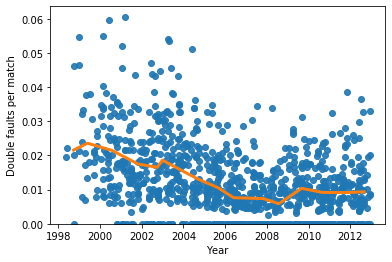

In [28]:
df.groupby('surface')['win'].mean()
gb = df.groupby('year')
from datetime import datetime
fig, ax = plt.subplots(1,1)
ax.plot_date(pd.to_datetime(date), df['db|faults'], alpha=25, lw=0)
ax.plot_date(pd.to_datetime(gb['start date'].max()), gb['db|faults'].mean(), '-', lw=3)
ax.set_xlabel('Year')
ax.set_ylabel('Double faults per match')
ax.set_ylim(0)


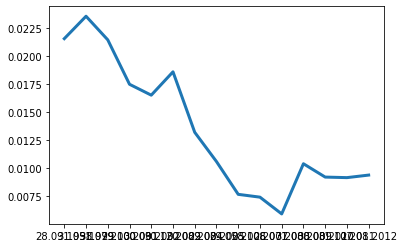

In [22]:
plt.plot_date(gb['start date'].max(), gb['db|faults'].mean(), '-', lw=3)

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
player = 'Roger Federer'
filename = '{name}.csv'.format(name=player.replace(' ', '-'))
df = pd.read_csv(filename)
df.head()
df.columns
df['player1 double faults']

0       2.0
1       0.0
2       3.0
3       6.0
4       NaN
       ... 
1174    5.0
1175    0.0
1176    0.0
1177    2.0
1178    NaN
Name: player1 double faults, Length: 1179, dtype: float64

In [39]:
#Z-TEST 동전 100번 던져서 앞면이 나올 확률이 61번
import numpy as np
import scipy.stats as st
import scipy.special as sp
n = 100
h = 61
q = .5
xbar = float(h) / n
z = (xbar - q) * np.sqrt(n/(q*(1-q))); z
print(z)

pval = 2 * (1 - st.norm.cdf(z))
pval

# 우리의 가설이 믿을만하다. 대다수 0.5 미만으로 나오면 믿을만한 것으로 판단한다.

2.1999999999999997


0.02780689502699718

(0, 9.238743259089906)

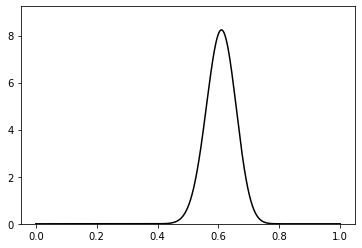

In [41]:
#Bayesian Methods
posterior = lambda n, h, q: ((n+1)*st.binom(n, q).pmf(h)) #사후확률 #확률밀도함수
n = 100
h = 61
q = np.linspace(0., 1., 1000)
d = posterior(n, h, q)
plt.plot(q, d, '-k')
plt.ylim(0, d.max()+1)

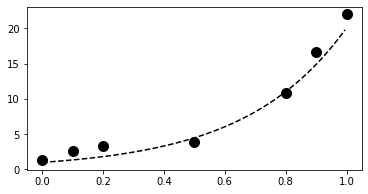

In [44]:
import sklearn.linear_model as lm
f = lambda x: np.exp(3 * x)
x_tr = np.linspace(0., 2, 200)
y_tr = f(x_tr)
x = np.array([0, .1, .2, .5, .8, .9, 1])
y = f(x) + np.random.randn(len(x))
plt.figure(figsize=(6,3));
plt.plot(x_tr[:100], y_tr[:100], '--k');
plt.plot(x, y, 'ok', ms=10);



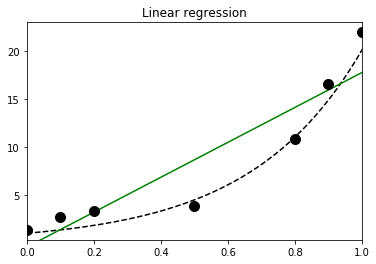

In [52]:
ir = lm.LinearRegression() #평균값을 알아보는 것이다. 데이터의 추세 등도 파악 가능
ir.fit(x[:, np.newaxis], y);
y_ir = ir.predict(x_tr[:, np.newaxis])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x_tr, y_ir, 'g');
plt.plot(x, y, 'ok', ms=10);
plt.xlim(0,1);
plt.ylim(y.min()-1, y.max()+1);
plt.title("Linear regression");

30.81 -12.61 0.00
-207.83 477.39 -314.04 56.99 8.18 0.00


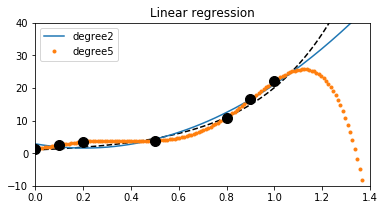

In [61]:
lrp = lm.LinearRegression()
plt.figure(figsize = (6,3));
plt.plot(x_tr,y_tr,'--k');
for deg, s in zip([2,5], ['-','.']):
    lrp.fit(np.vander(x,deg + 1), y);
    y_lrp = lrp.predict(np.vander(x_tr, deg+1))
    plt.plot(x_tr, y_lrp, s, label='degree' + str(deg));
    plt.legend(loc=2);
    plt.xlim(0, 1.4);
    plt.ylim(-10, 40);
    print(' '.join(['%.2f' % c for c in lrp.coef_]))
plt.plot(x, y, 'ok', ms=10)
plt.title("Linear regression");   
    

13.23 4.52 0.00
5.30 4.95 4.28 3.15 2.02 0.00


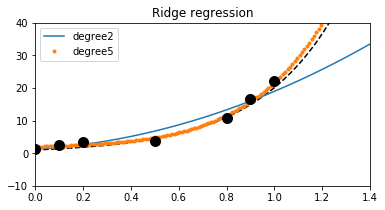

In [62]:
ridge = lm.RidgeCV()
plt.figure(figsize = (6,3));
plt.plot(x_tr,y_tr,'--k');
for deg, s in zip([2,5], ['-','.']):
    ridge.fit(np.vander(x,deg + 1), y);
    y_ridge = ridge.predict(np.vander(x_tr, deg+1))
    plt.plot(x_tr, y_ridge, s, label='degree' + str(deg));
    plt.legend(loc=2);
    plt.xlim(0, 1.4);
    plt.ylim(-10, 40);
    print(' '.join(['%.2f' % c for c in ridge.coef_]))
plt.plot(x, y, 'ok', ms=10)
plt.title("Ridge regression");   
    

In [ ]:
# 오버 피팅의 문제 원인
# - lack of data
# - model complex